In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
#시각화를 위한 폰트 설정
import os
if os.name =="posix": #운영체제가 리눅스라면
    sns.set(font="AppleGothic")
elif os.name=="nt": #운영체제가 윈도우라면
    sns.set(font="Malgun Gothic")

In [74]:
#글자를 선명하게
%config inlineBackend.figure_format='retina'

In [75]:
df_raw=pd.read_csv('국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20210205113912.csv', encoding='cp949')
df_raw.shape

(450, 5)

In [76]:
df_raw.head()

,국가(대륙)별,상품군별,판매유형별,2020 3/4,2020 4/4 p)
0,합계,합계,계,1621245,1536884
1,합계,합계,면세점,1410967,1247495
2,합계,합계,면세점 이외,210278,289389
3,합계,컴퓨터 및 주변기기,계,7777,3591
4,합계,컴퓨터 및 주변기기,면세점,3497,0


In [77]:
#국가별 빈도수 세기
df_raw['국가(대륙)별'].value_counts() # 컬럼의 unique value들을 count해주는 함수.

유럽연합(EU)      45
일본            45
중동            45
아세안(ASEAN)    45
중국            45
합계            45
미국            45
대양주           45
중남미           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [78]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2020 3/4', '2020 4/4 p)'], dtype='object')

In [79]:
df_raw.values

array([['합계', '합계', '계', 1621245, 1536884],
       ['합계', '합계', '면세점', 1410967, 1247495],
       ['합계', '합계', '면세점 이외', 210278, 289389],
       ...,
       ['기타', '기 타', '계', 826, 870],
       ['기타', '기 타', '면세점', 0, 0],
       ['기타', '기 타', '면세점 이외', 826, 870]], dtype=object)

In [80]:
df_raw.head()

,국가(대륙)별,상품군별,판매유형별,2020 3/4,2020 4/4 p)
0,합계,합계,계,1621245,1536884
1,합계,합계,면세점,1410967,1247495
2,합계,합계,면세점 이외,210278,289389
3,합계,컴퓨터 및 주변기기,계,7777,3591
4,합계,컴퓨터 및 주변기기,면세점,3497,0


In [81]:
#데이터 전처리하기
#column data를 행으로 바꿔보자
#column을 만들어서 기간별 데이터를 분석하고 시각화 할 수 있다.
#id_vars에 기준이된 column지정
df = df_raw.melt(id_vars=['국가(대륙)별','상품군별','판매유형별'],
var_name='기간',value_name='백만원')
df.shape

(900, 5)

In [82]:
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2020 3/4,1621245
1,합계,합계,면세점,2020 3/4,1410967
2,합계,합계,면세점 이외,2020 3/4,210278
3,합계,컴퓨터 및 주변기기,계,2020 3/4,7777
4,합계,컴퓨터 및 주변기기,면세점,2020 3/4,3497


In [83]:
#데이터프레임 정보 산출df.info()

In [84]:
#데이터 전처리 하기; 필드 제작(연도,분기,금액,더미 데이터 삭제)
df['기간']

0         2020 3/4
1         2020 3/4
2         2020 3/4
3         2020 3/4
4         2020 3/4
          ...     
895    2020 4/4 p)
896    2020 4/4 p)
897    2020 4/4 p)
898    2020 4/4 p)
899    2020 4/4 p)
Name: 기간, Length: 900, dtype: object

In [85]:
# 연도를 어떤식으로 만들 수 있을까?
int("2019 3/4 p".split()[0])

2019

In [86]:
df['연도']=df['기간'].map(lambda x: int(x.split()[0]))
df['분기']=df['기간'].map(lambda x: int(x.split()[1].split('/')[0]))
#결측치 = NaN, 숫자 타입 = int -> float
df['백만원']=df['백만원'].replace('-',np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2020 3/4,1621245.0,2020,3
1,합계,합계,면세점,2020 3/4,1410967.0,2020,3
2,합계,합계,면세점 이외,2020 3/4,210278.0,2020,3
3,합계,컴퓨터 및 주변기기,계,2020 3/4,7777.0,2020,3
4,합계,컴퓨터 및 주변기기,면세점,2020 3/4,3497.0,2020,3


In [87]:
# Boolean형으로 True인 컬럼별 행들을 확인
(df["국가(대륙)별"]=='합계')&(df['상품군별']=='합계')

0       True
1       True
2       True
3      False
4      False
       ...  
895    False
896    False
897    False
898    False
899    False
Length: 900, dtype: bool

In [88]:
# df은 df에 조건을 만족하는 값을 복사하여 초기화한다.
df=df[(df['국가(대륙)별']!='합계')&(df['상품군별']!='합계')].copy()
df.shape

In [89]:
#결측치 보기
df.isnull().sum()

국가(대륙)별    0
상품군별       0
판매유형별      0
기간         0
백만원        0
연도         0
분기         0
dtype: int64

In [90]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2020 3/4,1923.0,2020,3
49,미국,컴퓨터 및 주변기기,면세점,2020 3/4,0.0,2020,3
50,미국,컴퓨터 및 주변기기,면세점 이외,2020 3/4,1923.0,2020,3
51,미국,가전·전자·통신기기,계,2020 3/4,3286.0,2020,3
52,미국,가전·전자·통신기기,면세점,2020 3/4,5.0,2020,3


In [99]:
df_total=df[df['판매유형별']=="계"].copy()
df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2020 3/4,1923.0,2020,3
51,미국,가전·전자·통신기기,계,2020 3/4,3286.0,2020,3
54,미국,소프트웨어,계,2020 3/4,137.0,2020,3
57,미국,서 적,계,2020 3/4,2525.0,2020,3
60,미국,사무·문구,계,2020 3/4,68.0,2020,3
...,...,...,...,...,...,...,...
885,기타,아동·유아용품,계,2020 4/4 p),588.0,2020,4
888,기타,음·식료품,계,2020 4/4 p),92.0,2020,4
891,기타,농축수산물,계,2020 4/4 p),3.0,2020,4
894,기타,생활용품 및 자동차용품,계,2020 4/4 p),391.0,2020,4


<AxesSubplot:xlabel='분기', ylabel='백만원'>

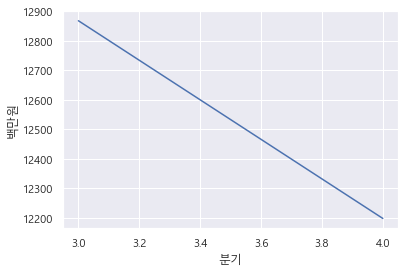

In [101]:
sns.lineplot(data=df_total, x='분기',y='백만원',ci=None)

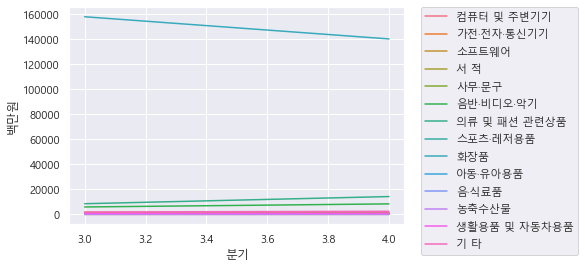

In [98]:
sns.lineplot(data=df_total, x='분기',y='백만원',hue='상품군별',
ci=None)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

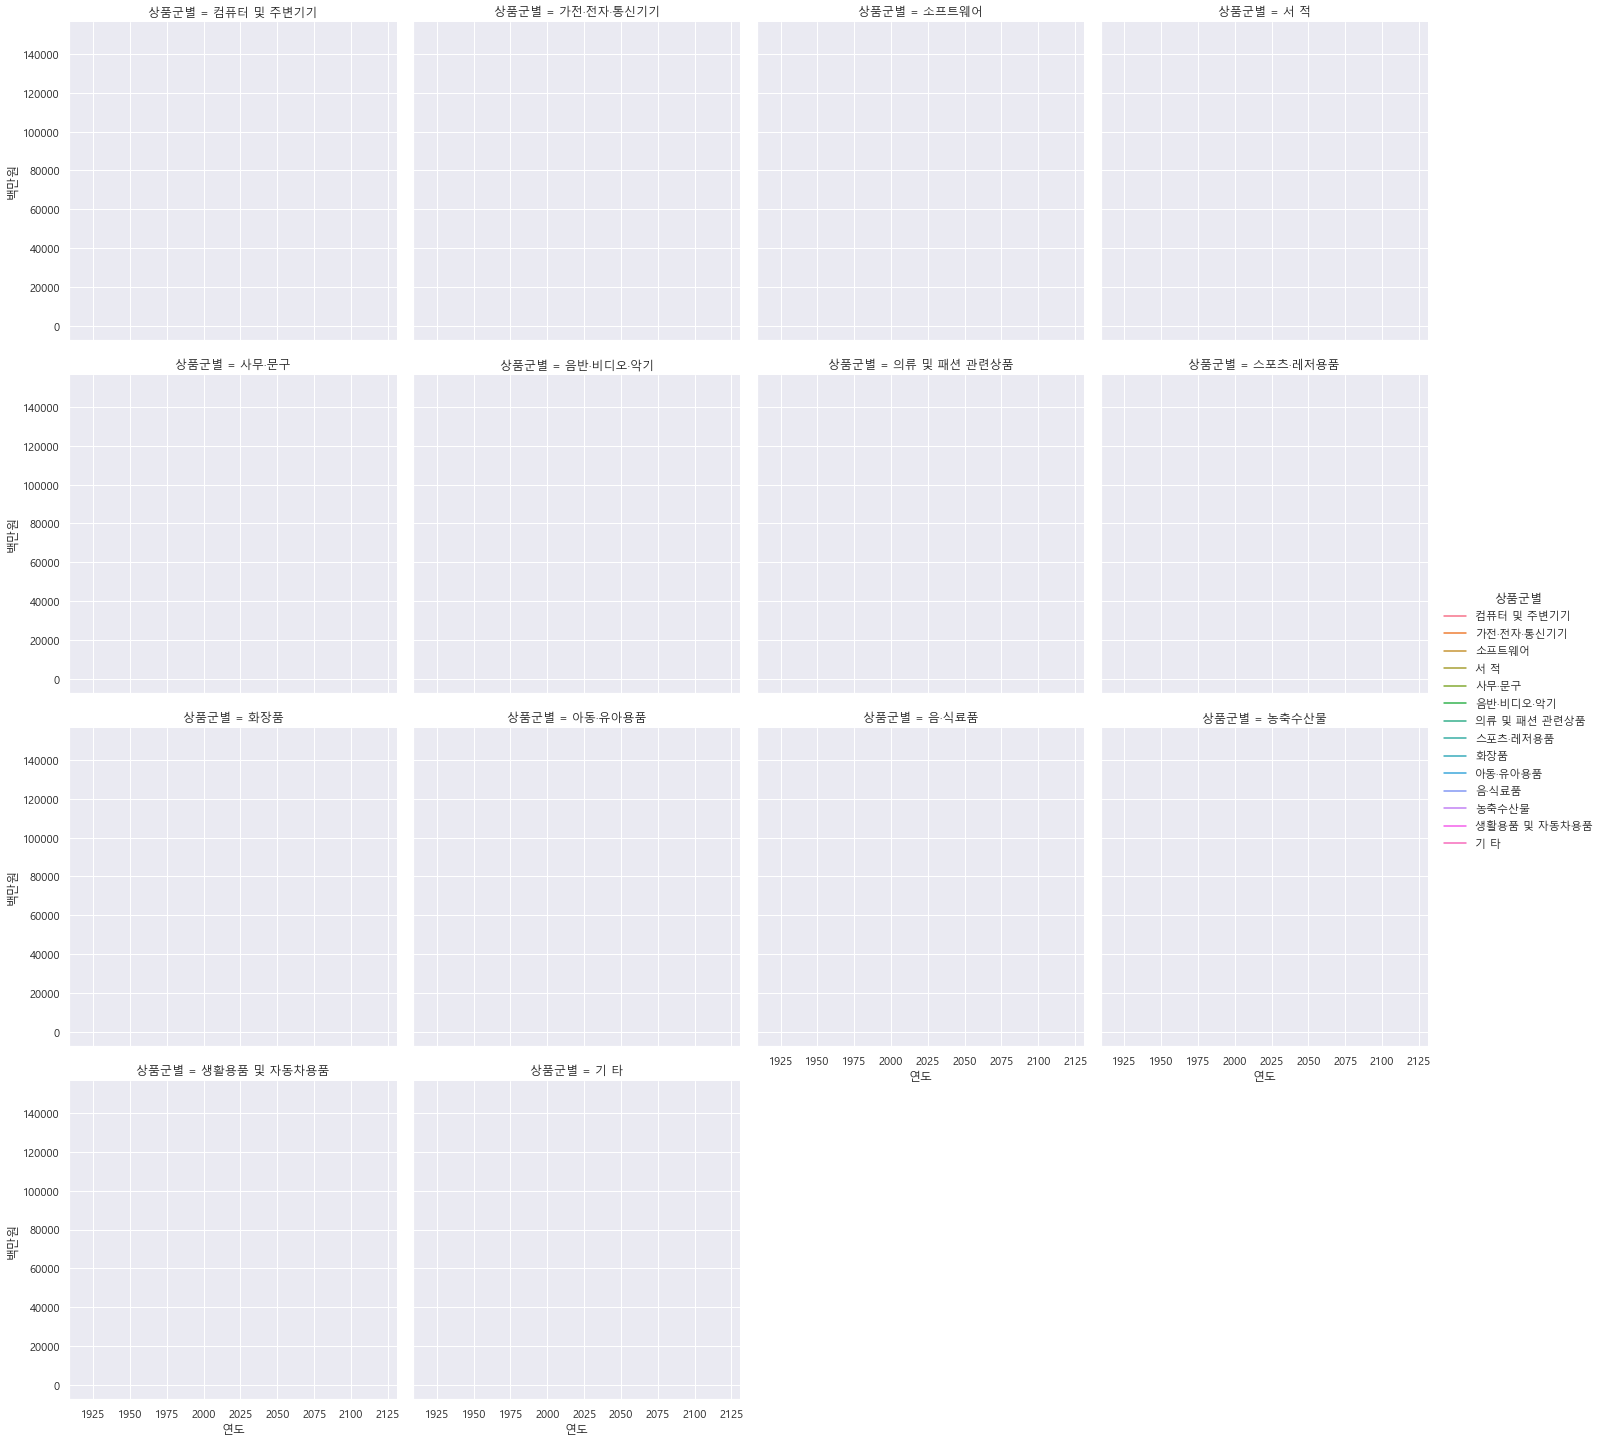

In [97]:
sns.relplot(data=df_total, x='연도', y='백만원',hue="상품군별",kind="line",col='상품군별',col_wrap=4,ci=None)

In [ ]:
plt.xticks?